In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 784)
Testing samples: (10000, 784)


In [3]:
input_dim = 784
hidden_dim = 64
sparsity_level = 0.05
lambda_sparse = 0.1

inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(hidden_dim, activation="relu")(inputs)
decoded = layers.Dense(input_dim, activation="sigmoid")(encoded)

autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

In [4]:
def sparse_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))

    hidden_output = encoder(y_true)
    mean_activation = tf.reduce_mean(hidden_output, axis=0)

    kl = tf.reduce_sum(
        sparsity_level * tf.math.log((sparsity_level + 1e-10) / (mean_activation + 1e-10)) +
        (1 - sparsity_level) * tf.math.log(((1 - sparsity_level) + 1e-10) / (1 - mean_activation + 1e-10))
    )

    return mse + lambda_sparse * kl

In [5]:
autoencoder.compile(optimizer="adam", loss=sparse_loss)

In [6]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2505 - val_loss: 0.1367
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1106 - val_loss: 0.1038
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0793 - val_loss: 0.0901
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0644 - val_loss: 0.0827
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0567 - val_loss: 0.0815
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0525 - val_loss: 0.0775
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0493 - val_loss: 0.0777
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0474 - val_loss: 0.0737
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0448 - val_loss: 0.0711
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0437 - val_loss: 0.0723
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0419 - val_loss: 0.0740
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [7]:
reconstructed = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


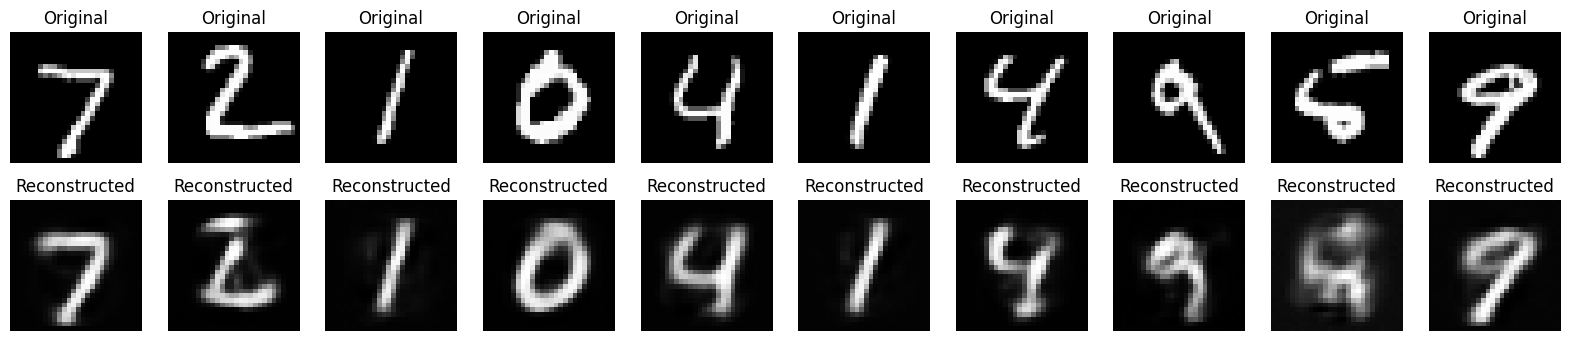

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


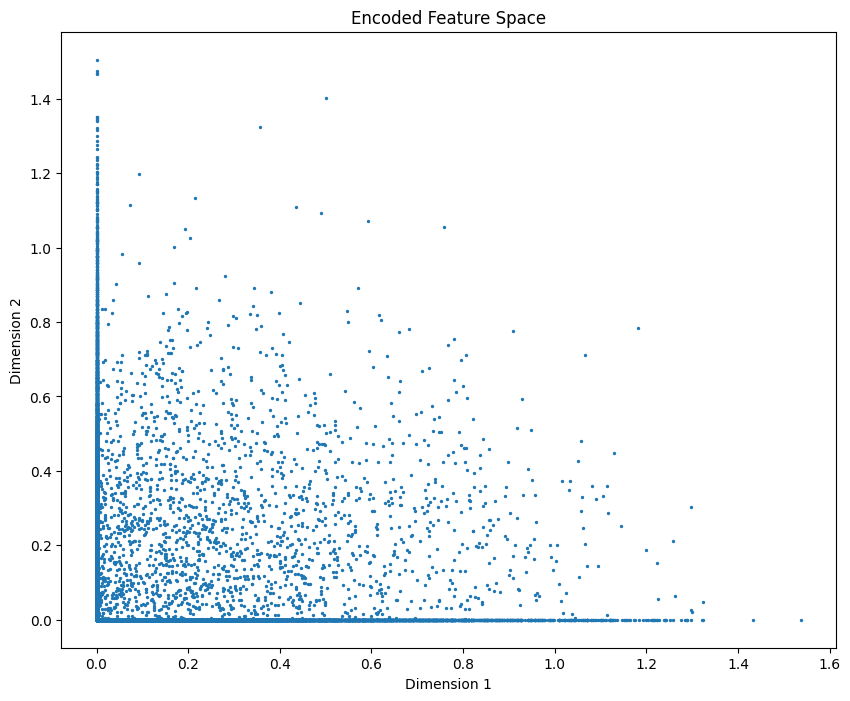

In [9]:
encoded_outputs = encoder.predict(x_train)

plt.figure(figsize=(10, 8))
plt.scatter(encoded_outputs[:, 0], encoded_outputs[:, 1], s=2)
plt.title("Encoded Feature Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


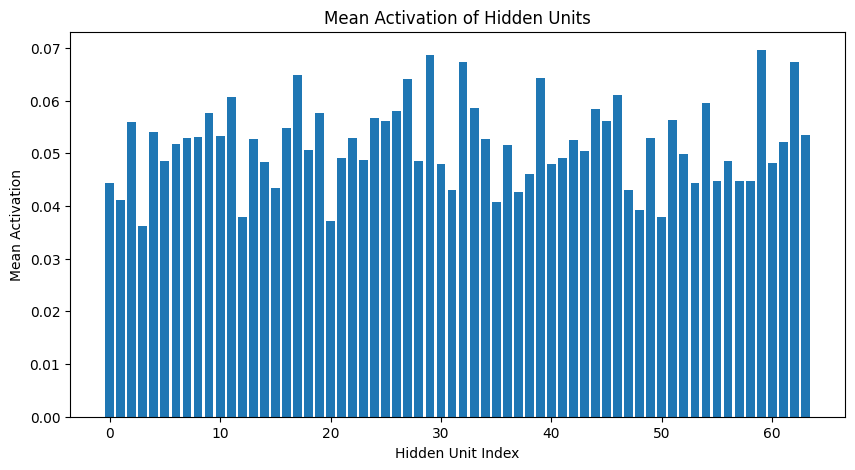

In [10]:
mean_activation = np.mean(encoded_outputs, axis=0)

plt.figure(figsize=(10, 5))
plt.bar(range(len(mean_activation)), mean_activation)
plt.title("Mean Activation of Hidden Units")
plt.xlabel("Hidden Unit Index")
plt.ylabel("Mean Activation")
plt.show()